# Exploring the Effects of Job Characteristics on Data Science Salaries

In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

salaries = pd.read_csv("ds_salaries.csv")
salaries = salaries[salaries["employee_residence"] == salaries["company_location"]]
us_salaries = salaries[salaries["employee_residence"] == "US"]
us_salaries = us_salaries[us_salaries["employment_type"] == "FT"]
us_salaries = us_salaries.drop(["salary_currency", "company_location", "employee_residence","salary_in_usd", "employment_type"], axis = 1)
us_salaries


,work_year,experience_level,job_title,salary,remote_ratio,company_size
5,2023,SE,Applied Scientist,222200,0,L
6,2023,SE,Applied Scientist,136000,0,L
9,2023,SE,Data Scientist,147100,0,M
10,2023,SE,Data Scientist,90700,0,M
11,2023,SE,Data Analyst,130000,100,M
...,...,...,...,...,...,...
3747,2021,MI,Applied Machine Learning Scientist,423000,50,L
3749,2021,SE,Data Specialist,165000,100,L
3750,2020,SE,Data Scientist,412000,100,L
3751,2021,MI,Principal Data Scientist,151000,100,L


Legend for Experience Level

    EN =  Entry Level
    MI = Junior Mid-Level
    SE =  Intermediate Senior Level
    EX = Expert Executive Level

<Axes: xlabel='salary', ylabel='Density'>

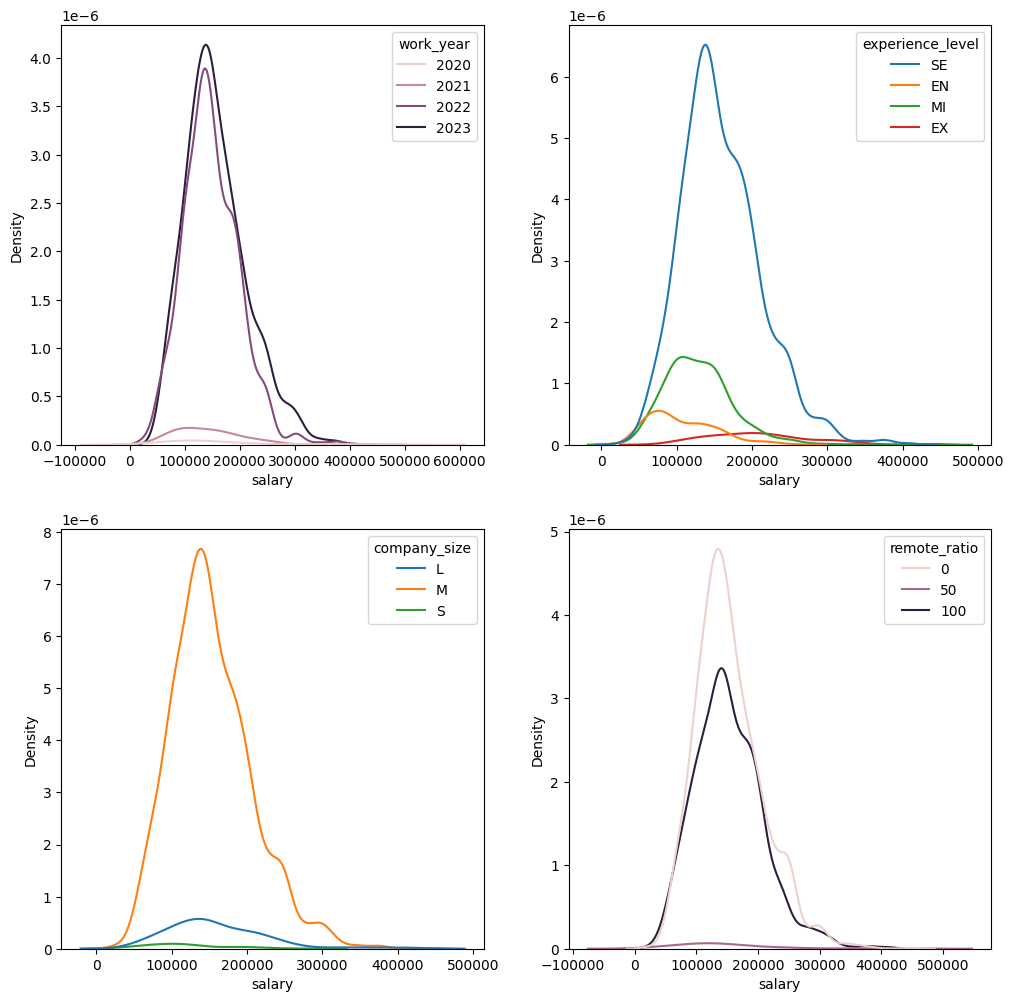

In [22]:
data =  us_salaries
fig, axs = plt.subplots(ncols=2, nrows=2)
fig.set_figwidth(12)
fig.set_figheight(12)
sns.kdeplot(data, x = "salary", hue = "work_year", ax = axs[0][0])
sns.kdeplot(data, x = "salary", hue = "experience_level", ax = axs[0][1])
sns.kdeplot(data, x = "salary", hue = "company_size", ax = axs[1][0])
sns.kdeplot(data, x = "salary", hue = "remote_ratio", ax = axs[1][1])

#### Measuring the Average Treatment Effects of Certain Job Characteristics on Data Science Role Salaries in The US

Below is a Gaussian Generalized Linear Model that calculates the average effect of company, size,year, remote ratio, and experience level have on a Full-Time Data Scientist in the US. The control goup are data scientists with entry level experience, with zero remote work, and work at a medium size company. 

In [37]:
data_dum = pd.get_dummies(data, columns = ["company_size", "remote_ratio","experience_level"], dtype=float)

freq_model = sm.GLM(data_dum["salary"], exog = data_dum.drop(["job_title","salary","company_size_M","remote_ratio_0","experience_level_EN"],axis = 1), 
                  family=sm.families.Gaussian())
freq_res = freq_model.fit()
print(freq_res.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:                 salary   No. Observations:                 2991
Model:                            GLM   Df Residuals:                     2983
Model Family:                Gaussian   Df Model:                            7
Link Function:               Identity   Scale:                      2.6853e+09
Method:                          IRLS   Log-Likelihood:                -36709.
Date:                Fri, 23 Jun 2023   Deviance:                   8.0104e+12
Time:                        16:39:08   Pearson chi2:                 8.01e+12
No. Iterations:                     3   Pseudo R-squ. (CS):             0.1202
Covariance Type:            nonrobust                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
work_year              52.1307    

In [38]:
freq_res.params

work_year                  52.130714
company_size_L          13043.268583
company_size_S         -17713.641822
remote_ratio_50         10634.662478
remote_ratio_100        -2401.038487
experience_level_EX    101755.298252
experience_level_MI     24032.935944
experience_level_SE     53770.069143
dtype: float64

From the results we can see that each year there is a very marginal increase in average salary. We can see that remote ratio has no statistically significant effect on salary given the z-score of the remote features being smaller in magnitude than 1.96. We can also see that as the company gets larger the salary for data scientists tends to increase at a statistically and economically significant amount. Salary increases with experience level as expected. Interestingly, it seems that average effect of working at a large company compared to a small company is equal to the average effect of being promoted to a Junior Mid-Level role from entry level role. The same is true of one is being promoted from Junior to Senior roles.

#### Other Interesting Data

<Axes: xlabel='salary_in_usd', ylabel='Density'>

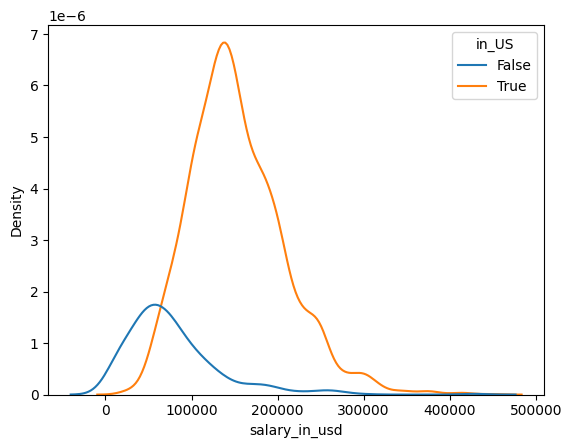

In [59]:
in_US = salaries["employee_residence"] == "US"
salaries["in_US"] = in_US
sns.kdeplot(salaries, x = "salary_in_usd", hue = "in_US")

In [56]:
salaries["employee_residence"].value_counts()

employee_residence
US    2999
GB     166
CA      83
ES      75
IN      56
      ... 
AM       1
VN       1
IL       1
HK       1
MT       1
Name: count, Length: 67, dtype: int64

It is interesting to note how the US pays greater salaries for Data Science, however this doesn't take into account the cost of living. Additionally, there isn't much data from other nations for their salaries, so chart may not be very representative of the true differences.